In [1]:
#Mount Google Drive
#Connect Google Drive
from google.colab import drive
force_remount=True
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/NLP/

/content/drive/MyDrive/Colab Notebooks/NLP


In [15]:
#Import API Account Kaggle
from google.colab import files
!ls -lha kaggle.json

-rw------- 1 root root 66 Dec 31 16:58 kaggle.json


In [16]:
#Need Permission
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content/drive/MyDrive/Colab Notebooks/NLP


In [19]:
#Download Dataset Kaggle
!kaggle datasets download -d dwiwahyuef/movie-genre-dataset

 95% 9.00M/9.46M [00:00<00:00, 89.8MB/s]
100% 9.46M/9.46M [00:00<00:00, 89.8MB/s]


In [23]:
#Ekstrak File Dataset
!unzip movie-genre-dataset.zip

Archive:  movie-genre-dataset.zip
  inflating: movie_dataset.csv       


In [24]:
import pandas as pd

#Load File
df = pd.read_csv("movie_dataset.csv")
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [25]:
#Mengecek jumlah data tiap genre
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [26]:
#Hapus genre yang jumlah datanya tidak sampai 2000
df = df[~df['genre'].isin(['sci-fi','horror','other','adventure','romance'])]
df['genre'].value_counts()

drama       8873
thriller    6824
comedy      2941
action      2392
Name: genre, dtype: int64

In [27]:
import re

# Menghapus special character di kolom text
df['Text'] = df['text'].map(lambda x: re.sub(r'\W+', ' ', x))
# drop kolom id dan text lama
df = df.drop(['id', 'text'], axis=1)
df.head(10)

,genre,Text
0,thriller,eady dead maybe even wishing he was INT 2ND FL...
1,comedy,t summa cum laude and all And I m about to lau...
2,drama,up Come I have a surprise She takes him by th...
3,thriller,ded by the two detectives INT JEFF S APARTMENT...
4,drama,nd dismounts just as the other children reach ...
5,thriller,breadth of the bluff Gabe pulls out his ancien...
6,thriller,uilding A MAN in pajamas runs out into the rai...
7,drama,ELLES AND RITA HAYWORTH Just disgustingly rich...
8,thriller,Memphis goes back into the garage Budgy cackl...
9,action,e reels as the world spins Sweat pours off him...


In [28]:
genre = pd.get_dummies(df.genre)
df_genre = pd.concat([df, genre], axis=1)
df_genre = df_genre.drop(columns='genre')
df_genre.head(10)

,Text,action,comedy,drama,thriller
0,eady dead maybe even wishing he was INT 2ND FL...,0,0,0,1
1,t summa cum laude and all And I m about to lau...,0,1,0,0
2,up Come I have a surprise She takes him by th...,0,0,1,0
3,ded by the two detectives INT JEFF S APARTMENT...,0,0,0,1
4,nd dismounts just as the other children reach ...,0,0,1,0
5,breadth of the bluff Gabe pulls out his ancien...,0,0,0,1
6,uilding A MAN in pajamas runs out into the rai...,0,0,0,1
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,0,0,1,0
8,Memphis goes back into the garage Budgy cackl...,0,0,0,1
9,e reels as the world spins Sweat pours off him...,1,0,0,0


In [29]:
#Ubah tipe data menjadi str
X = df_genre['Text'].astype(str)
#label = df_genre[
#    ['action', 'adventure','comedy', 'drama', 
#     'horror', 'other', 'sci-fi', 'thriller']].values
Y = df_genre[['action','comedy','drama','thriller']].values

In [30]:
from sklearn.model_selection import train_test_split

#Membagi data data train 80% data val 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)

#Konversi ke Sequence
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
#    Embedding(input_dim=5000, output_dim=16),
#    LSTM(64),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(4, activation='softmax')

    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 154,532
Trainable params: 154,532
Non-trai

In [33]:
#Memanggil fungsi compile pada objek model
#Dan menententukan loss function serta optimizer
#Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.CategoricalCrossentropy(),metrics = ['accuracy'])

In [34]:
#Penggunaan Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [35]:
#Pelatihan Model
history = model.fit(padded_train, Y_train, epochs=50, validation_data=(padded_test, Y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
526/526 - 79s - loss: 1.1455 - accuracy: 0.4542 - val_loss: 1.0094 - val_accuracy: 0.4883 - 79s/epoch - 150ms/step
Epoch 2/50
526/526 - 70s - loss: 0.8798 - accuracy: 0.5332 - val_loss: 0.9219 - val_accuracy: 0.5178 - 70s/epoch - 134ms/step
Epoch 3/50
526/526 - 71s - loss: 0.7601 - accuracy: 0.6211 - val_loss: 0.8094 - val_accuracy: 0.6037 - 71s/epoch - 136ms/step
Epoch 4/50
526/526 - 69s - loss: 0.5518 - accuracy: 0.7562 - val_loss: 0.6319 - val_accuracy: 0.7399 - 69s/epoch - 132ms/step
Epoch 5/50
526/526 - 71s - loss: 0.4206 - accuracy: 0.8191 - val_loss: 0.6238 - val_accuracy: 0.7986 - 71s/epoch - 135ms/step
Epoch 6/50
526/526 - 69s - loss: 0.3454 - accuracy: 0.8661 - val_loss: 0.5061 - val_accuracy: 0.8409 - 69s/epoch - 132ms/step
Epoch 7/50

Akurasi train dan validasi didapat telah mencapai nilai > 90%!
526/526 - 71s - loss: 0.2506 - accuracy: 0.9170 - val_loss: 0.4874 - val_accuracy: 0.8379 - 71s/epoch - 135ms/step


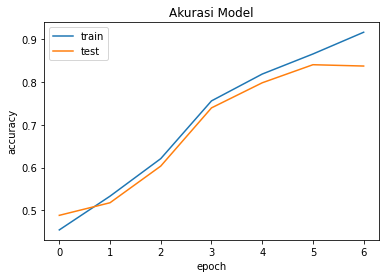

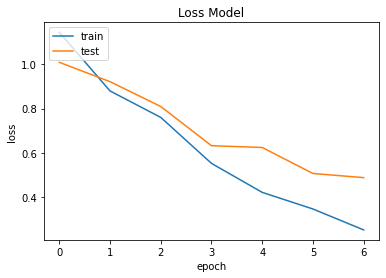

In [36]:
import matplotlib.pyplot as plt

# Grafik Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grafik Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
